#Importing necessary packages 

In [147]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
infot = pd.read_csv('/content/drive/MyDrive/Information.csv',encoding='latin-1')
infot.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [150]:
infot.shape

(20050, 26)

In [151]:
infot.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [152]:
infot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [153]:
infot.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [154]:
infot.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [155]:
infot['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
           ..
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

In [156]:
infot['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
           ..
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

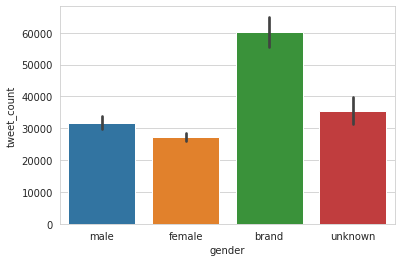

In [157]:
sns.barplot (x = 'gender', y = 'tweet_count',data = infot)

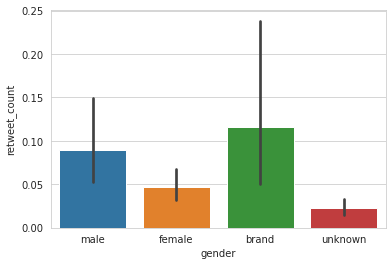

In [158]:
sns.barplot (x = 'gender', y = 'retweet_count',data = infot)

#Visualizing null values to get a better idea of the dataset & it's trends

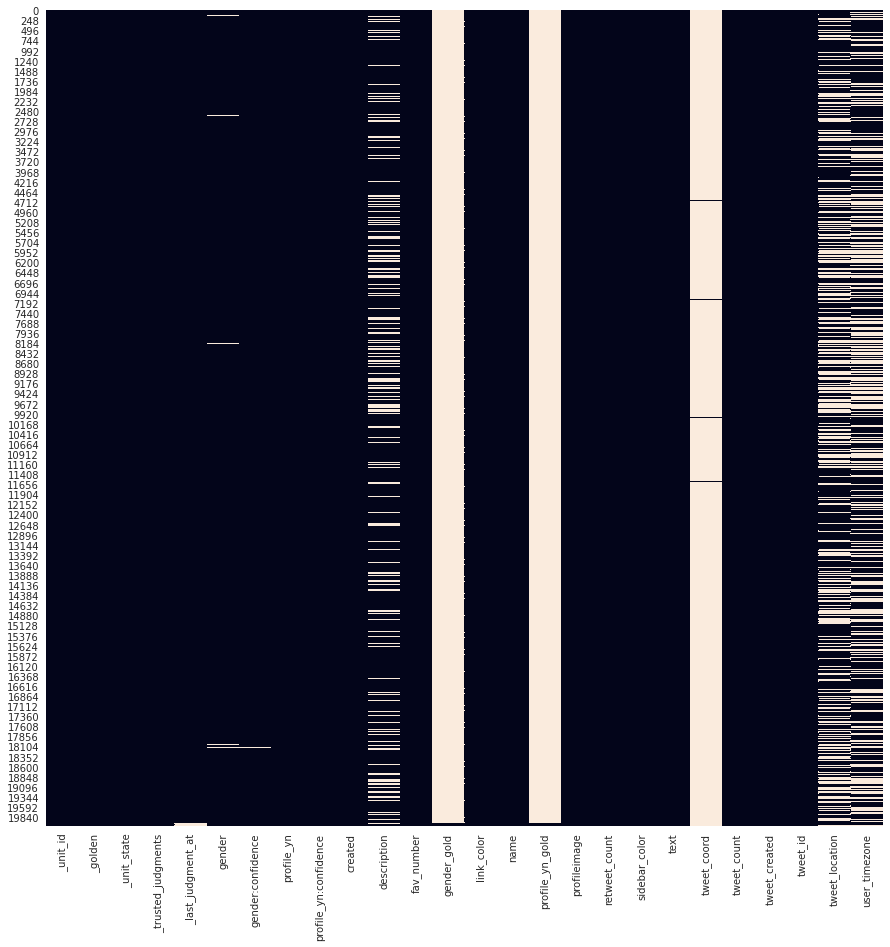

In [159]:
plt.subplots(figsize=(15,15))
sns.heatmap(infot.isnull(), cbar=False)

#Dropping irrelevant columns from dataset

In [160]:
infot = infot.drop(['_unit_id', '_golden', '_unit_state', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 
                        'created', 'fav_number', 'gender_gold', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 
                        'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 
                        '_trusted_judgments'], axis = 1)

In [161]:
infot.head()

,gender,description,link_color,sidebar_color,text
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


In [162]:
infot['gender'].count()

19953

In [163]:
infot['gender'].value_counts(dropna=False)

female     6700
male       6194
brand      5942
unknown    1117
NaN          97
Name: gender, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


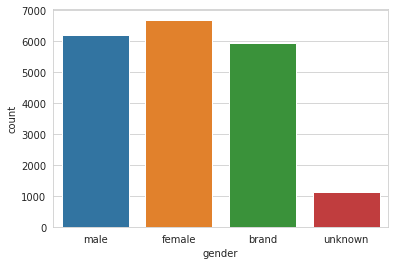

In [164]:
sns.countplot(infot['gender'],label="Gender")

#dropping all the null values from 'gender'

In [165]:
infot=infot.dropna(subset=['gender'],how ='any')
infot.head()

,gender,description,link_color,sidebar_color,text
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


#Merging the 'text' & 'description' to combine all sorts of text and then find out common words

In [167]:
infot['text_description'] = infot['text'].str.cat(infot['description'], sep=' ')

In [168]:
infot.head()

,gender,description,link_color,sidebar_color,text,text_description
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,Watching Neighbours on Sky+ catching up with t...


#Junk words & letters other than the English vocab words are filtered out

In [169]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = s.replace(",","")
    s = re.sub('[!@#$_]', '', s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub('\s\W',' ',s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace("[\w*"," ")
    return s

infot['text_description'] = [cleaning(s) for s in infot['text_description']]
infot.head()

,gender,description,link_color,sidebar_color,text,text_description
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,robbie e responds to critics after win against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,ûïit felt like they were my friends and i was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking at the url do you use ...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,watching neighbours on sky catching up with th...


In [170]:
from collections import Counter
words = Counter()
for twit in infot['text_description']:
    for x in twit.split(' '):
        words[x] += 1

words.most_common(20)

[('', 24229),
 ('the', 17886),
 ('and', 16165),
 ('t', 11058),
 ('i', 10464),
 ('to', 8441),
 ('a', 7830),
 ('of', 7234),
 ('you', 5757),
 ('in', 5365),
 ('for', 5309),
 ('is', 4518),
 ('my', 3965),
 ('nan', 3733),
 ('it', 3675),
 ('s', 3621),
 ('on', 3379),
 ('me', 3020),
 ('with', 2564),
 ('that', 2483)]

#Filtering out 'text_description' and printing most commonly used words by elimination stopwords

In [219]:
#first download the necessary libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import nltk as nlp

lemma = nlp.WordNetLemmatizer()

In [172]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
words_filtered = Counter()
for x, y in words.items():
    if not x in stopwords:
        words_filtered[x]=y

words_filtered.most_common(20)

[('', 24229),
 ('nan', 3733),
 ('û', 2104),
 ('ù', 1730),
 ('love', 1630),
 ('like', 1350),
 ('get', 1269),
 ('ü', 1226),
 ('http', 1129),
 ('one', 1111),
 ('life', 1025),
 ('new', 917),
 ('time', 914),
 ('êû', 884),
 ('news', 808),
 ('best', 766),
 ('people', 753),
 ('day', 749),
 ('follow', 710),
 ('world', 689)]

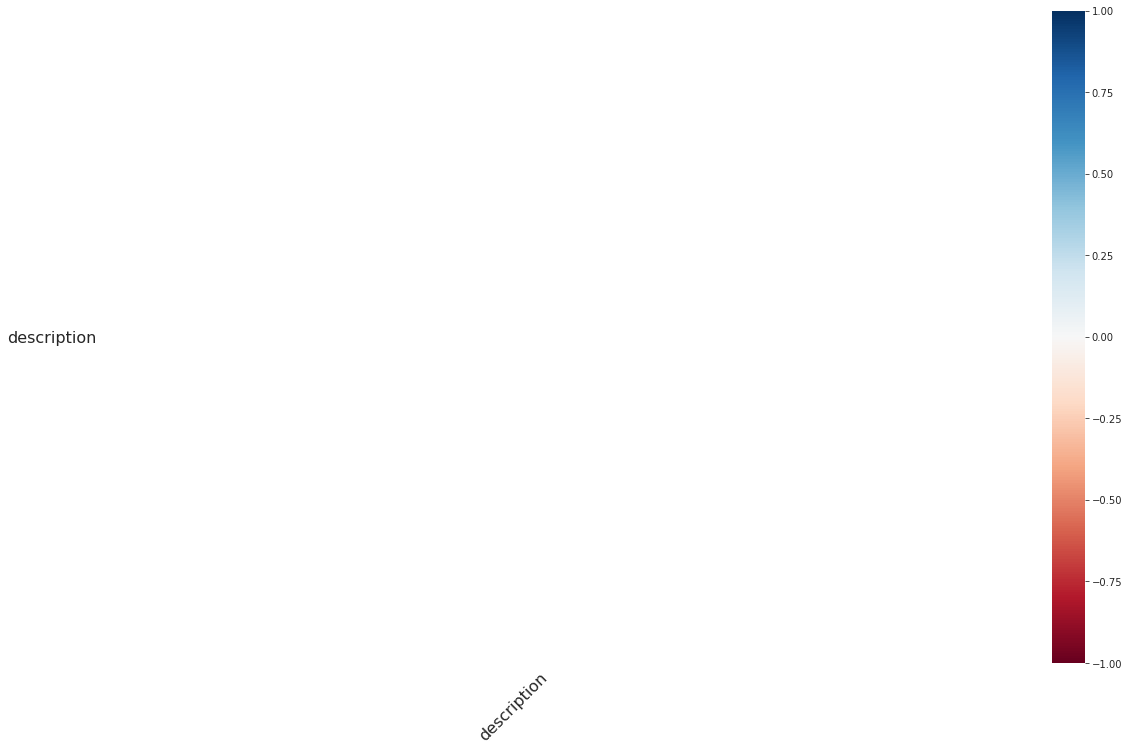

In [173]:
# for heatmap analysis import
import missingno as msno

#visualize the data 
msno.heatmap(infot)

**QUESTIONS**

1] Text analysis based on common words used by Males & Females ?

2] How significant are the color attributes used by the users ?

In [174]:
#This will clear out the rest of the remaining junk

In [175]:
import re
def preprocessor(text_description):
    text_description = re.sub("[^a-zA-z]", " ",text_description)
    text_description = re.sub('<[^>]*>', '', text_description)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text_description)
    text_description = (re.sub('[\W]+', ' ', text_description.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text_description

In [176]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text_description): #tokenizer to break down our twits in individual words
    return text_description.split()

def tokenizer_porter(text_description):
    return [porter.stem(word) for word in text_description.split()]

In [177]:
infot.text_description

0        robbie e responds to critics after win against...
1         ûïit felt like they were my friends and i was...
2        i absolutely adore when louis starts the songs...
3        hi jordanspieth looking at the url do you use ...
4        watching neighbours on sky catching up with th...
                               ...                        
20045    lookupondeath fine and i ll drink tea too i lo...
20046    greg hardy you a good player and all but don t...
20047    you can miss people and still never want to se...
20048    bitemyapp i had noticed your tendency to pee o...
20049    i think for my apush creative project i m goin...
Name: text_description, Length: 19953, dtype: object

## **Now we do the color attribute analysis for male and female using side_bar color**

['C0DEED' '0' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


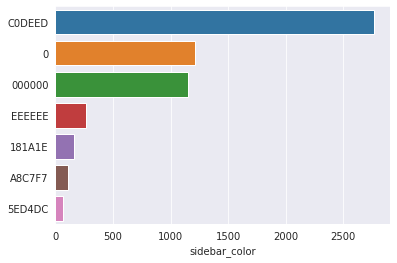

In [178]:
#for male
male_sidebar_color =infot[infot['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_sidebar_color_idx = male_sidebar_color.index
male_top_color = male_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid")
sns.barplot (x = male_sidebar_color, y = male_top_color) 

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' '181A1E']


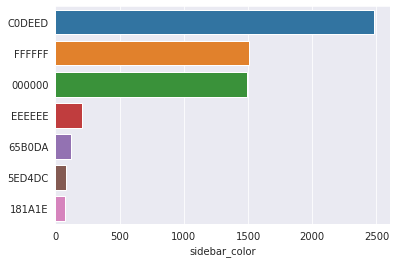

In [179]:
#female
female_sidebar_color = infot[infot['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_sidebar_color_idx = female_sidebar_color.index
female_top_color = female_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid")
sns.barplot (x = female_sidebar_color, y = female_top_color)

## **Now we do the color attribute analysis for male and female using link_color**

['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' '0']


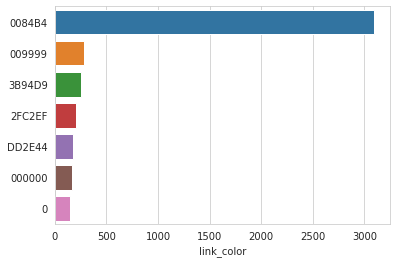

In [180]:
male_link_color = infot[infot['gender'] == 'male']['link_color'].value_counts().head(7)
male_link_color_idx = male_link_color.index
male_top_color = male_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_link_color, y = male_link_color_idx)

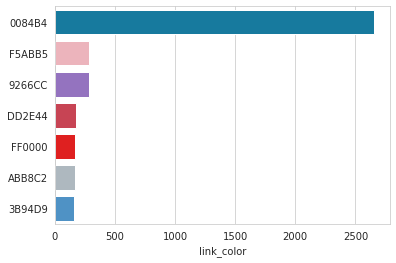

In [181]:
female_link_color = infot[infot['gender'] == 'female']['link_color'].value_counts().head(7)
female_link_color_idx = female_link_color.index
female_top_color = female_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_link_color, y = female_link_color_idx, palette=list(map(l, female_top_color)))

#The frequency of the words will be helpful in classifying the gender of the users.

1. Logistic Regression
2. Random forest
3. Naive bayes Classifier

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [183]:
# Setting up training and testing data

In [184]:
encoder = LabelEncoder()
y = encoder.fit_transform(infot['gender'])
X = infot['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Modelling on Logistic Regression 

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.3777146675576345


#Modelling on Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.37621115937186766


#Accuracy:

Logistic Regression: 57.92%
Random Forest: 53.92%


#Training for color attributes

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(infot['gender'])
X = infot['sidebar_color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Modelling on Logistic Regression(sidebar_color)

In [195]:

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.4034413631807551


#Modelling for Random Forest(sidebar_color)

In [194]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.40477781490143666


## **Accuracy for side_bar color**

Logistic Regression : 40.4%
Random Forest: 40.3%

#Modelling for Link color

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(infot['gender'])
X = infot['link_color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Modelling on Logistic Regression(link_color)

#Modelling for Random Forest(link_color)

In [201]:

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.4034413631807551


In [202]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.40477781490143666


#Accuracy for 'link_color':

Logistic Regression: 40.34%
Random Forest: 40.47%


# Naive bayes Classifier

In [215]:
#now i am gonna concat gender and description only
data = pd.concat([infot.gender,infot.description],axis=1)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       19953 non-null  object
 1   description  16224 non-null  object
dtypes: object(2)
memory usage: 467.6+ KB
None


In order to classify our data, we need to get rid of string values.

female -> 1 male -> 0

In [216]:
data.dropna(axis = 0,inplace = True)
data.gender = [1 if each == "female" else 0 for each in data.gender]
print(data.head())
print(data.info())

   gender                                        description
0       0                              i sing my own rhythm.
1       0  I'm the author of novels filled with family dr...
2       0                louis whining and squealing and all
3       0  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4       1  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       16224 non-null  int64 
 1   description  16224 non-null  object
dtypes: int64(1), object(1)
memory usage: 380.2+ KB
None


In [ ]:
 #cleaning data 
description_list = []
for description in data.description:
    # regular expression RE  "[^a-zA-Z]"
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # converting to lowercase
    # description = description.split()
    description = nltk.word_tokenize(description)
    # lemmatazation loved => love   gitmeyecegim = > git
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in words_filtered] #[ ps.stem(word) for word in description]
    description = " ".join(description)  
    description_list.append(description)
description_list[0:5]


In [ ]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer 
max_features = 5000 

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  
print("the most used {} some of the words: {}".format(max_features,count_vectorizer.get_feature_names()[0:5]))

y = data.iloc[:,0].values   # male or female classes
x = sparce_matrix

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
# %% naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#%% prediction
y_pred = nb.predict(x_test)

print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

In Naive Bayes : 46.22%

So therefore the Logistic regression gave accuracy more than Naive Bayes and Random Forest